<a href="https://colab.research.google.com/github/anjalish05/Face-Recognizer/blob/main/face_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Modules 

In [61]:
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt 
from datetime import datetime

In [ ]:
!pip install dlib 
import dlib 

In [ ]:
!pip install face_recognition 
import face_recognition 

### Loading Images

In [ ]:
path = 'Images'
images = []
classNames = []
myList = os.listdir(path)
print(myList)


['jack ma.jpg', 'bill.jpg', 'elon.jpg', 'elon_1.jpg']


In [ ]:
# cls: class, cl: name of our image
for cl in myList:
  cur_img = cv2.imread(f'{path}/{cl}')
  images.append(cur_img)
  classNames.append(os.path.splitext(cl)[0]) # gives only the names and removes '.jpg'

print("the list of images:", classNames)



the list of images: ['jack ma', 'bill', 'elon', 'elon_1']


In [ ]:
img_elon = cv2.imread('Images/elon_1.jpg')
img_elon_rgb = cv2.cvtColor(img_elon, cv2.COLOR_BGR2RGB)

img_test = cv2.imread('Images/elon.jpg')
img_test_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)

img_bill = cv2.imread('Images/bill.jpg')
img_bill_rgb = cv2.cvtColor(img_bill, cv2.COLOR_BGR2RGB)


Text(0.5, 1.0, 'Elon test')

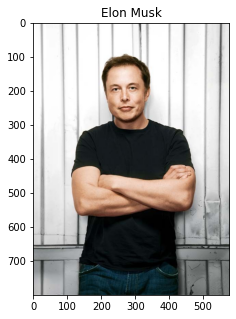

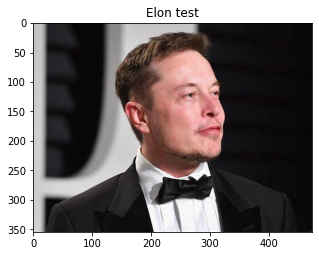

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(img_elon_rgb)
plt.title("Elon Musk")
# plt.axes('off')

plt.figure(figsize=(5, 5))
plt.imshow(img_test_rgb)
plt.title("Elon test")
# plt.axes('off')

### Making Face Detector 

(163, 318, 271, 211)


Text(0.5, 1.0, 'Detected Face')

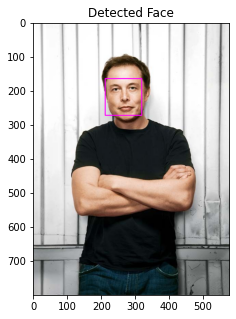

In [ ]:
face_loc = face_recognition.face_locations(img_elon_rgb)[0]
encode_elon = face_recognition.face_encodings(img_elon_rgb)[0]
cv2.rectangle(img_elon_rgb, (face_loc[3], face_loc[0]), (face_loc[1], face_loc[2]), (255, 0, 255), 2) 
# the last two arguments above are the color (chosen color is purple) and the thickness which is 2

print(face_loc) 
# there comes four values which are: top, right, bottom and left so that we can give the 
# (x1, y1), (x2, y2) in our rectangle 

plt.figure(figsize=(5, 5))
plt.imshow(img_elon_rgb)
plt.title("Detected Face")


Test face location (64, 356, 219, 201)


Text(0.5, 1.0, 'Detected Test Face')

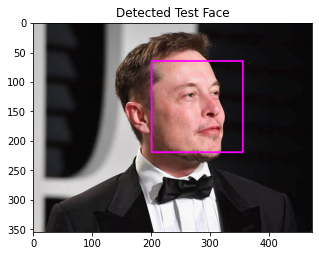

In [ ]:
test_face_loc = face_recognition.face_locations(img_test_rgb)[0]
test_encode_elon = face_recognition.face_encodings(img_test_rgb)[0]
cv2.rectangle(img_test_rgb, (test_face_loc[3], test_face_loc[0]), (test_face_loc[1], test_face_loc[2]), (255, 0, 255), 2) 

print("Test face location", test_face_loc) 

plt.figure(figsize=(5, 5))
plt.imshow(img_test_rgb)
plt.title("Detected Test Face")

In [ ]:
bill_face_loc = face_recognition.face_locations(img_bill_rgb)[0]
bill_encode = face_recognition.face_encodings(img_bill_rgb)[0]
cv2.rectangle(img_bill_rgb, ((bill_face_loc[3]), (bill_face_loc[0])), ((bill_face_loc[1]), (bill_face_loc[2])), (255, 0, 255), 2) 

print(bill_face_loc)

(68, 282, 175, 175)


In [ ]:
# we'll use linear SVM to compare if the faces are same or not 

results = face_recognition.compare_faces([encode_elon], test_encode_elon)
results_with_bill = face_recognition.compare_faces([encode_elon], bill_encode)
print("Elon and Test Elon:", results, "\nElon and Gates:", results_with_bill)
# the encodings do not match for bill and elon

Elon and Test Elon: [True] 
Elon and Gates: [False]


Face Distance: [0.42373735]
Face distance between Elon and Bill: [0.72352292]


Text(0.5, 1.0, 'Test Elon')

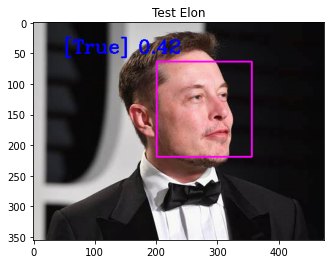

In [ ]:
# sometimes, there can be a lot of pictures, so similarities in pictures of two different people cold be there
# so, to detect the similarities, we find the best match, we find the distance

face_dist = face_recognition.face_distance([encode_elon], test_encode_elon)
# the lower the distance, the better the match is 
print("Face Distance:", face_dist)
face_dist_bill = face_recognition.face_distance([encode_elon], bill_encode)
print("Face distance between Elon and Bill:", face_dist_bill)

# so there's a clear difference, when they do match and when they do not 

# face_dist is an array
# this jsut puts texts on the test image since we took the test image as the argument 
#                            comparison     face distance        origin        font style           scale  color:blue thickness                        
cv2.putText(img_test_rgb, f'{results} {round(face_dist[0], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

plt.imshow(img_elon_rgb)
plt.title('Elon')
plt.imshow(img_test_rgb)
plt.title('Test Elon')

## Attendance Project 

Whenever we have to bring in a new image, we have to write it manually and give it a name and store it and find its encodings, so we can create a list that gets the images from the folder and generate its encodings and try to find it in the webcam. 

To find the image older and to find the number of images it has, import them to find the encodings, we import 'os' 

In [ ]:
def find_encodings(images):
  encode_list = []
  for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode = face_recognition.face_encodings(img)[0]
    encode_list.append(encode)

    return encode_list 

# face_loc = face_recognition.face_locations(img_elon_rgb)[0]
# encode_elon = face_recognition.face_encodings(img_elon_rgb)[0]
# cv2.rectangle(img_elon_rgb, (face_loc[3], face_loc[0]), (face_loc[1], face_loc[2]), (255, 0, 255), 2) 

In [ ]:
encodeListKnown = find_encodings(images) # for known faces 
print(len(encodeListKnown))
print("Encoding complete")

1
Encoding complete


#### Initializing Webcam

#### Marking Attendance

In [68]:
# to mark attendance

def markAttendance(name):
  with open('attendance.csv', 'r+') as f:
    # if someone has already arrived, we don't want to repeat 
    myDataList = f.readlines()
    nameList = [] # we want to put all the names we find in this list 
    # entry[0]: names, entry[1]: time
    print(myDataList)
    for line in myDataList:
      entry = line.split(',') # we want to split based on comma 
      nameList.append(entry[0]) # will append only the names in the list 
    if name not in nameList:
      now = datetime.now()
      dtString = now.strftime('%H:%M:%S')
      f.writelines(f'\n {name}, {dtString}')

markAttendance('Elon')
# this entered Elon in the attendance.csv file 


['Name, Time \n', 'Elon, 20:02:31']


In [70]:

cap = cv2.VideoCapture(1) # initializing webcam 
# 0 as default value of webcam 
# while loop to get each frame
# while(cap.isOpened()):
      
#     while True:
          
#         ret, img = cap.read()
#         cv2.imshow('img', img)
#         if cv2.waitKey(30) & 0xff == ord('q'):
#             break
              
#     cap.release()
#     cv2.destroyAllWindows()
# else:
#     print("Alert! Camera disconnected")


while True:
  success, img = cap.read() # this gives image
  if(cv2.waitKey(10) & 0xFF == ord('b')):
    break
  img_small = cv2.resize(img, (0, 0), None, 0.25, 0.25) # 1/4th the size
  img_small = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  print(img_small.shape)
  # in webcam, we can find multiple faces, so for that we're going to find the locations 
  # of face, then send the locations to find encodings 
  facesCurrFrame = face_recognition.face_locations(img_small)
  encodeCurrFrame = face_recognition.face_Encodings(img_small, facesCurrFrame)

  # now we're moving on to 3rd step where we find matches
  # we iterate through all the faces in current frame, then, compare the faces with encodings 

  for encodeFace, faceLoc in zip(encodeCurrFrame, facesCurrFrame):
    # it will grab one face location and one encoding from encodecurrfeame and facesCurrFrame
    matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
    # since we're inputting a list as the argument, we're gonna get a list only as the output
    faceDist = face_recognition.face_distance(encodeListKnown, encodeFace)

    # the lowest distance would be our best match
    print(faceDist)

    matchIndex = np.argmin(faceDist)

    # we can display a bounding box around them aand then, write the name
    if matches[matchIndex]:
      name = classNames[matchIndex].upper()
      print(name)
      y1, x2, y2, x1 = faceLoc
      y1, x2, y2, x1 = y1*4, x2*4, y2*4, x1*4
      cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
      cv2.rectangle(img, (x1, y2-35), (x2, y2), (0, 255, 0), cv2.FILLED)
      cv2.putText(img, name, (x1+6, y2-6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)

      markAttendance(name)

  cv2.imshow('Webcam', img)
  cv2.waitKey(1)


It only marks the attendance for the people who are not there in the list. <br>
If the name is already there in the list, and if we show the picture of the same person again, it won't come in the list again. 